**Semana 8: Actividad Semanal -- 7 Regresiones y K means**

**Nombre: Alexis Hernández Martínez**

**Matrícula: A01016308**

**Materia: Ciencia y Analítica de Datos**

**Profesor: Dra. María de la Paz Rico**

**Fecha: Sábado 5 Noviembre 2022**

**Parte 1: Notebook 1. Regresión.**

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso




In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

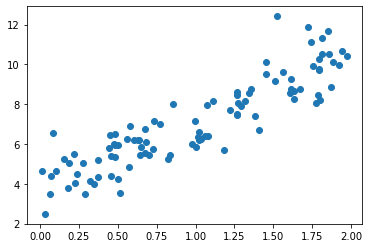

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

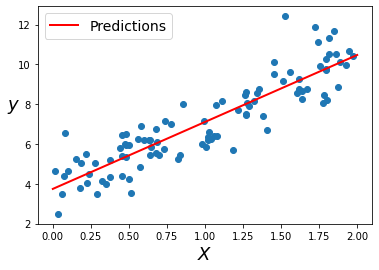

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

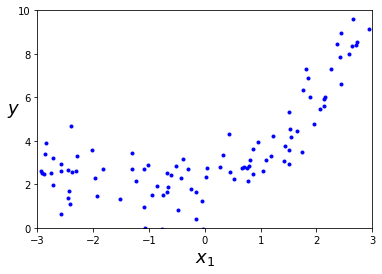

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

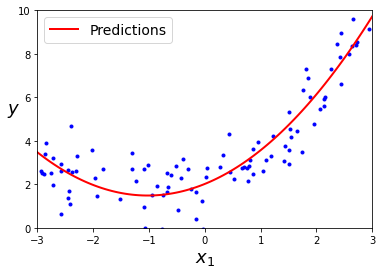

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

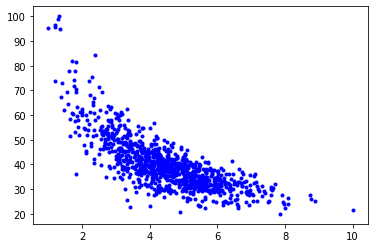

In [27]:
plt.plot(X,y,'b.')

**Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.**

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).


In [28]:
# En este punto se hace la división de los datos, con un factor de 0.80 para entrenamiento
# como lo vimos en clase

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Regresión Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

El modelo generado es y= [-6.21850698] x + 67.89012908512076

Error medio Absoluto (MAE): 4.513943834797746
Root Mean Squared Error: 5.932738736518162
r2_score 0.5695897011831417

Abajo se muestra la visualización de los datos con su regresión predicha:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


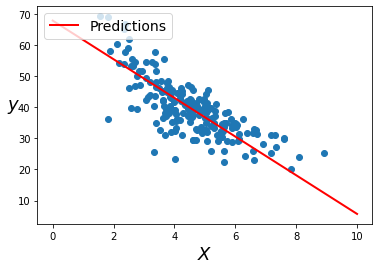

In [29]:
# En esta parte se llama al modelo y se entrena con los datos de Train

LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)

# Se crean predicciones con el modelo ya entrenado
X_fit = np.linspace(0, 10, 1000)
y_fit = LR.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

print("El modelo generado es y=",LR.coef_,"x +",LR.intercept_)


# En esta parte se hacen los cálculos de los errores con base en entrenar la partición de Test

y_pred = LR.predict(X_test)
MAE_LR=metrics.mean_absolute_error(y_test,y_pred)
R2_LR=r2_score(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))

print("\nAbajo se muestra la visualización de los datos con su regresión predicha:")

**Regresión Polinomial.**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

El modelo generado es y= 1.271819521314982 x2 + -17.816369652617624 x + 92.0358203494911

Error medio Absoluto (MAE): 4.372292708304974
Root Mean Squared Error: 5.7642490498667875
r2_score 0.5936898412489067

Abajo se muestra la visualización de los datos con su regresión predicha:


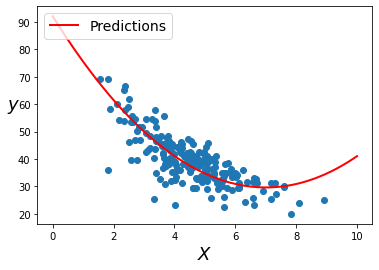

In [30]:
# Se siguen los mismos pasos que en la regresión lineal, solo que ahora llamando a PolynomialFeatures para incluir
# el grado con el que queremos trabajar, en este caso el grado 2 para evitar sobreentrenamiento

Transf_PR = PolynomialFeatures(degree=2, include_bias = False)
XPR_train = Transf_PR.fit_transform(X_train)
PR = LinearRegression(fit_intercept=True)
PR.fit(XPR_train, y_train)

y_pred = PR.predict(XPR_train)

X_fit = np.linspace(0, 10, 1000).reshape(1000,1)
XPR_train_fit = Transf_PR.fit_transform(X_fit)
XPR_train_fit
y_fit = PR.predict(XPR_train_fit)

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

print("El modelo generado es y=",PR.coef_[1],"x2 +",PR.coef_[0],"x +",PR.intercept_)

# En esta parte se hacen los cálculos de los errores con base en entrenar la partición de Test

XPR_train = Transf_PR.fit_transform(X_test)
y_pred = PR.predict(XPR_train)
R2_PR=r2_score(y_test,y_pred)
MAE_PR=metrics.mean_absolute_error(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

print("\nAbajo se muestra la visualización de los datos con su regresión predicha:")

**Realiza la regresión con Ridge y Lasso.**

Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.




Análisis para la penalización Ridge

El modelo generado es y= [-6.17547792] x + 67.69832459233837

Error medio Absoluto (MAE): 4.506130801850514
Root Mean Squared Error: 5.921036118900737
r2_score 0.5712860372520076

Abajo se muestra la visualización de los datos con su regresión predicha:


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


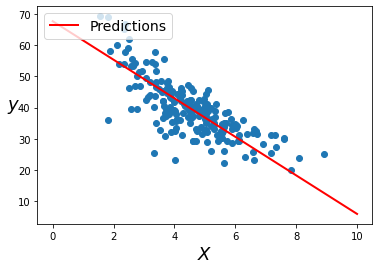

In [31]:
# Se aplica el modelo de Ridge, después de jugar con varios valores, se observó que un alpha=10 trae los mejores
# resultados, aunque en realidad la diferencia entre los distintos valores llega a ser muy poca

Ridge_PR=Ridge(alpha = 10, solver = 'auto', random_state = 42)
Ridge_PR.fit(X_train,y_train)
y_pred=Ridge_PR.predict(X_test)

# Se crean predicciones con el modelo ya entrenado
X_fit = np.linspace(0, 10, 1000)
y_fit = Ridge_PR.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

print("Análisis para la penalización Ridge\n")
print("El modelo generado es y=",Ridge_PR.coef_,"x +",Ridge_PR.intercept_)

# En esta parte se hacen los cálculos de los errores con base en entrenar la partición de Test

MAE_Ridge=metrics.mean_absolute_error(y_test,y_pred)
R2_Ridge=r2_score(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))

print("\nAbajo se muestra la visualización de los datos con su regresión predicha:")



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Análisis para la penalización Lasso

El modelo generado es y= [-5.66108868] x + 65.40540488853618

Error medio Absoluto (MAE): 4.450063719199247
Root Mean Squared Error: 5.822404969487834
r2_score 0.585449898879745

Abajo se muestra la visualización de los datos con su regresión predicha:


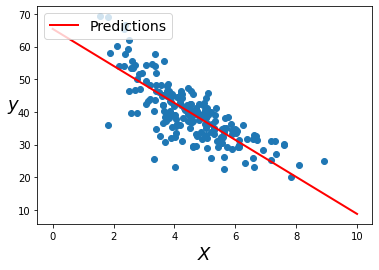

In [32]:
# Se aplica el modelo de Lasso, después de jugar con varios valores, se observó que un alpha=1 trae los mejores
# resultados, en este caso la diferencia de los valores de alpha si llega a ser muy grande

Lasso_PR=Lasso(alpha = 1,random_state = 42)
Lasso_PR.fit(X_train,y_train)
y_pred=Lasso_PR.predict(X_test)

# Se crean predicciones con el modelo ya entrenado
X_fit = np.linspace(0, 10, 1000)
y_fit = Lasso_PR.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
print("Análisis para la penalización Lasso\n")
print("El modelo generado es y=",Lasso_PR.coef_,"x +",Lasso_PR.intercept_)

# En esta parte se hacen los cálculos de los errores con base en entrenar la partición de Test

MAE_Lasso=metrics.mean_absolute_error(y_test,y_pred)
R2_Lasso=r2_score(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))

print("\nAbajo se muestra la visualización de los datos con su regresión predicha:")

**Finalmente grafica :**

MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

MAE
[4.513943834797746, 4.372292708304974, 4.506130801850514, 4.450063719199247]


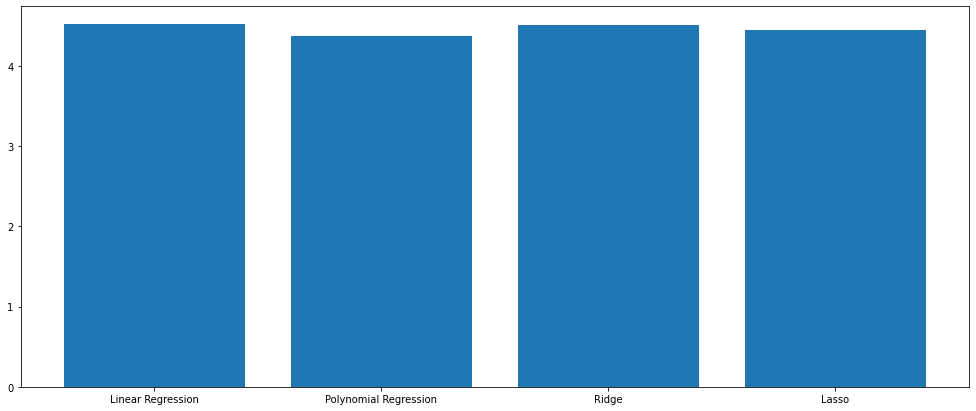

In [33]:
def diagramas(metricas):
    sumt=list()
    diagrama=metricas
    sumt.append(diagrama)
    return sumt

Metricas = list()
Metricas.append('Linear Regression')
Metricas.append('Polynomial Regression')
Metricas.append('Ridge')
Metricas.append('Lasso')

MAE = list()
MAE.append(MAE_LR)
MAE.append(MAE_PR)
MAE.append(MAE_Ridge)
MAE.append(MAE_Lasso)

fig, ax = plt.subplots(figsize =(17, 7))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)


plt.show()

r2
[0.5695897011831417, 0.5936898412489067, 0.5712860372520076, 0.585449898879745]


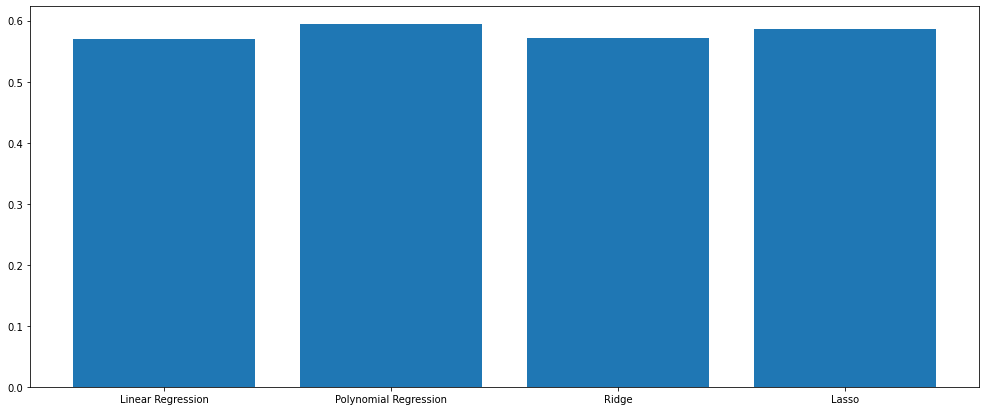

In [34]:
R2 = list()
R2.append(R2_LR)
R2.append(R2_PR)
R2.append(R2_Ridge)
R2.append(R2_Lasso)

fig, ax = plt.subplots(figsize =(17,7))
print("r2")
print(R2)
R2=list(R2)
plt.bar(Metricas,R2)


plt.show()

**Explica tus resultados, que método conviene más a la empresa, ¿por qué?**

Después de este análisis, podemos concluir que el método de regresión polinomial es el que más conviene a la empresa. Desde el punto de vista matemática, podemos comprobarlo ya que PR fue el que tuvo errores más bajos y al mismo tiempo tuvo el R2 más grande. De igual manera, esto se puede validar de forma visual, pues al graficar los datos originales podemos ver que los datos iniciales como los finales tienen una ligera curvatura, la cual se puede explicar claramente con una regresión polinomial. Aplicando Lasso y Ridge vemos que tampoco hay mucha diferencia pues castigar un modelo lineal solamente tiene la capacidad de modificar la inclinación de la curva.


**¿Qué porcentajes de entrenamiento y evaluación?** 

Después de aplicar algunos porcentajes entre 70/30, 80/20 y 90/10, no observamos mucha diferencia entre cada uno de ellos, por lo que decidimos dejar el porcentaje estándar de 80/20 que vimos en clase para este tipo de datos.

**¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?**

La magnitud de los errores MAE y RMSE estuvieron en el orden de 4 y 5 unidades, mientras que la magnitud de la salida Y está  en el orden de 20 y 70 unidades. Considero que los errores en este punto fueron bastante altos, pero no debido a un mal uso del método, sino por las limitaciones del mismo. La regresión polinomial si está bien entrenada pues sigue claramente la tendencia de los datos, pero el hecho de que para una misma X existan diferentes valores de Y, de diversa magnitud, complica la eficacia del método y provoca que veamos errores de grandes magnitudes. Las regresiones lineales fueron una gran ayuda, pero sin duda correría este tipo de información con otros métodos para probar, como puede ser SVM, red neuronal o random forest. 




**#Ejercicio 2**

Realiza la regresión polinomial de los siguientes datos:

Encuentra el mejor regresor para los datos de las casas:



In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21528,3416600750,20150217T000000,585000.0,3,2.50,1750,1381,3.0,0,0,...,8,1750,0,2008,0,98122,47.6021,-122.294,1940,4800
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19947,1776460110,20141223T000000,395000.0,4,2.75,2280,5013,2.0,0,0,...,8,2280,0,2009,0,98019,47.7333,-121.976,2130,5121


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [37]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


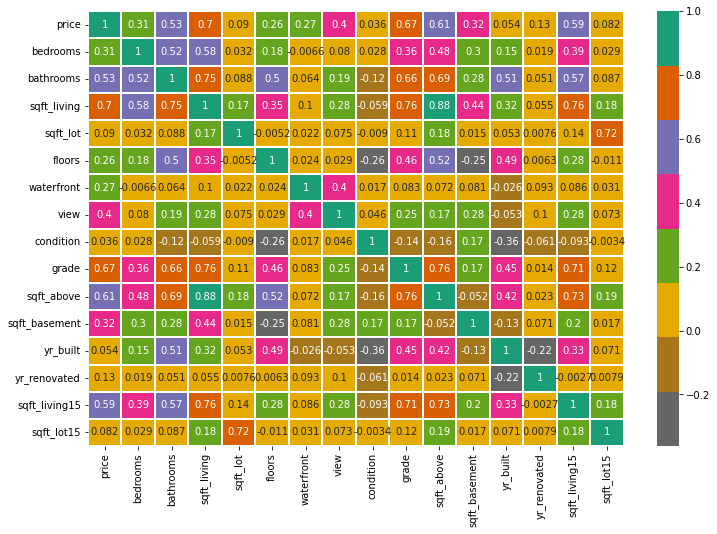

In [39]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [40]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

**Divide los datos. Utiliza la función train_test_split**

In [41]:
# En este punto se hace la división de los datos, con un factor de 0.80 para entrenamiento
# como lo vimos en clase

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


**Regresión Múltiple Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [42]:
# En esta parte se llama al modelo y se entrena con los datos de Train

LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)

# En esta parte se hacen los cálculos de los errores con base en entrenar la partición de Test

y_pred = LR.predict(X_test)
MAE_LR=metrics.mean_absolute_error(y_test,y_pred)
R2_LR=r2_score(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))




Error medio Absoluto (MAE): 143187.80429162097
Root Mean Squared Error: 228673.8237293404
r2_score 0.6541020314679733


**Regresión Múltiple Polinomial.**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [43]:
# Se siguen los mismos pasos que en la regresión lineal, solo que ahora llamando a PolynomialFeatures para incluir
# el grado con el que queremos trabajar, en este caso el grado 2 para evitar sobreentrenamiento

poly_transform = PolynomialFeatures(degree=2, include_bias = False)
polyX = poly_transform.fit_transform(X_train)
PR = LinearRegression(fit_intercept=True)
PR.fit(polyX, y_train)

# En esta parte se hacen los cálculos de los errores con base en entrenar la partición de Test
polyX = poly_transform.fit_transform(X_test)
y_pred = PR.predict(polyX)
R2_PR=r2_score(y_test,y_pred)
MAE_PR=metrics.mean_absolute_error(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))




Error medio Absoluto (MAE): 130089.16388450991
Root Mean Squared Error: 213321.68825645253
r2_score 0.6989870860317033


**Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

In [44]:
Ridge_PR=Ridge(alpha = 10, solver = 'auto', random_state = 42)
Ridge_PR.fit(X_train,y_train)
y_pred=Ridge_PR.predict(X_test)


print("Análisis para la penalización Ridge\n")
# En esta parte se hacen los cálculos de los errores con base en entrenar la partición de Test

MAE_Ridge=metrics.mean_absolute_error(y_test,y_pred)
R2_Ridge=r2_score(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))



Análisis para la penalización Ridge


Error medio Absoluto (MAE): 143279.3714203613
Root Mean Squared Error: 228871.55562190723
r2_score 0.6535035840454587


In [45]:
Lasso_PR=Lasso(alpha = 10,random_state = 42, max_iter=100000)
Lasso_PR.fit(X_train,y_train)
y_pred=Lasso_PR.predict(X_test)


# En esta parte se hacen los cálculos de los errores con base en entrenar la partición de Test

MAE_Lasso=metrics.mean_absolute_error(y_test,y_pred)
R2_Lasso=r2_score(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))




Error medio Absoluto (MAE): 143190.81355874642
Root Mean Squared Error: 228679.22278951696
r2_score 0.6540856977576865


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.583e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


**Finalmente grafica :**
    
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

MAE
[143187.80429162097, 130089.16388450991, 143279.3714203613, 143190.81355874642]


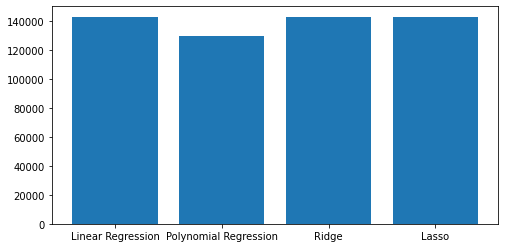

In [46]:
MAE = list()
MAE.append(MAE_LR)
MAE.append(MAE_PR)
MAE.append(MAE_Ridge)
MAE.append(MAE_Lasso)

fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)


plt.show()

r2
[0.6541020314679733, 0.6989870860317033, 0.6535035840454587, 0.6540856977576865]


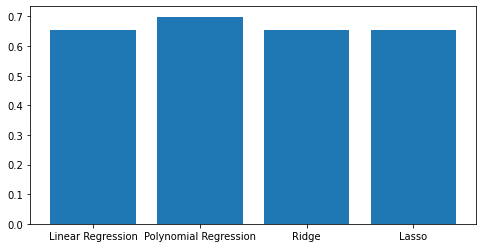

In [47]:
R2 = list()
R2.append(R2_LR)
R2.append(R2_PR)
R2.append(R2_Ridge)
R2.append(R2_Lasso)
fig, ax = plt.subplots(figsize=(8, 4))
print("r2")
print(R2)
R2 = list(R2)
plt.bar(Metricas, R2)

plt.show()

**Explica tus resultados, que método conviene más a la empresa, ¿por qué?**

Después de este análisis, podemos concluir que el método de regresión polinomial es el que más conviene a la empresa. Desde el punto de vista matemático, también en este ejercicio vemos una clara tendencia a que la regresión polinomial muestra mejores resultados. Este caso es más complicado de analizar visualmente debido a que tenemos 15 factores de entrada, por lo que cobra mucha más relevancia basar nuestro análisis en la comparación de los errores.


**¿Qué porcentajes de entrenamiento y evaluación?** 

Al igual que en el ejercicio 1, después de aplicar algunos porcentajes entre 70/30, 80/20 y 90/10, no observamos mucha diferencia entre cada uno de ellos, por lo que decidimos dejar el porcentaje estándar de 80/20 que vimos en clase para este tipo de datos.

**¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Los errores MAE, por ejemplo, están en el rango de 13,000-14,000 unidades, mientras que la media del precio está en 50,000, por lo que considero que los errores para este ejercicio, en promedio son mayores. Lo curioso de este caso es que la R2 alcanza un valor alto para las predicciones, de 69%, solo a 1% de distancia de alcanzar el 70%, que el número a partir del cual se considera un buen fit para las R2. Esto tiene sentido ya que, con base en los datos descritos arriba, la desviación estándar del precio está en unidades de 35,000, por lo que hace sentido que exista mucha variación en el precio en grandes cantidades, y al mismo tiempo existan muchos valores típicos o comunes agrupados, lo cual pudiera provocar errores altos y R2 decentes al mismo tiempo. Al igual que en el ejercicio anterior, no usaría la regresión lineal como método definitivo sino que evaluaría métodos adicionales para el tipo de datos reales que estamos viendo.


**Agrega las conclusiones**

Las regresiones lineales son grandes métodos para poder encontrar tendencias en cómo fluye un conjunto de datos dentro de un dataset, sin importar si las variables de entrada son muchas o son pocas. Personalmente encuentro este tipo de métodos como una gran referencia para evitar que un modelo final se sobreentrene, ya que utilizar la regresión lineal simple o polinomial de grado 2 o 3 (claro, dependiendo de los datos), nos puede dar un modelo fácil y sencillo a partir del cual podemos esperar que nuestro método final mejore. 

Este tipo de métodos no tienen la capacidad de analizar si las variables de entrada son independientes o no, por lo que personalmente combinaría este tipo de métodos con el de PCA para poder trabajar polinomialmente con variables que si sean independientes, de esta forma podemos hacer mejores predicciones con R2 más altas y con errores más pequeños.

Finalmente, vemos la utilidad de usar penalizaciones como la de Ridge y Lasso, aunque considero que en regresiones lineales su uso no es tan eficaz o aprovechado como si utilizarmos otro tipo de métodos para nuestras predicciones. En el caso de Ridge, los valores de alpha nos ayudan a hacer menos pronunciadas los saltos/curvas que el modelo encuentre, mientras que Lasso tiene la capacidad de anular o dejar alguna de estas pronunciaciones, con el objetivo de no sobreentrenar el modelo. 
